# JiJiJaJa - Algorithm for fair room assignments

> By Lucu & Pavliushka

## Intro

We load all the necessary modules



In [1]:
from index import *

import matplotlib.pyplot as plt

And load the rooms, persons and grades

In [2]:
rooms,persons,mat = load_csv("grades.csv")

omat = ordinal_matrix(mat)

print(rooms)
print(persons)
print('Number of persons:',mat.shape[0],"| Number of rooms:",mat.shape[1])

['I', 'II', 'III', 'IV', 'V', 'VI', 'VII', 'VIII', 'IX', 'X', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XXI', 'XXII']
['Lucas', 'Victor', 'Eulalia', 'Joni', 'Guillem', 'Joan', 'Ruth', 'Claire', 'Aina', 'Carlo', 'Julia C', 'Clara', 'Julia J', 'Estella', 'Tura', 'Pablo']
Number of persons: 16 | Number of rooms: 22


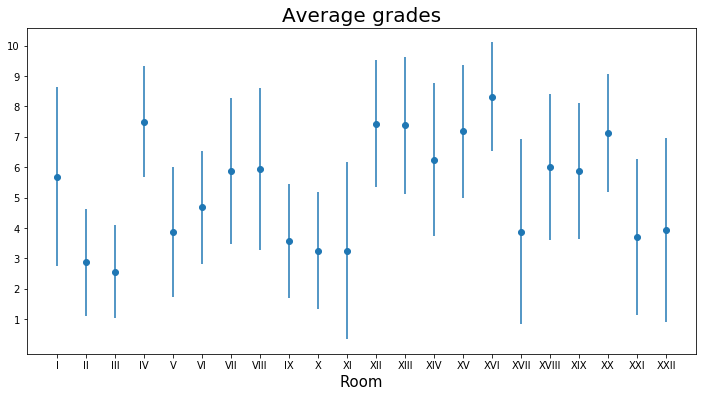

In [3]:
avg_grade = avg_cols(mat)
dev_grade = std_cols(mat)

x = range(1,mat.shape[1]+1)
y = avg_grade
e = dev_grade

plt.figure(figsize=(12,6))
plt.errorbar(x, y, yerr=e, fmt='o')
plt.yticks(np.arange(1,11))
plt.xlabel("Room",fontsize=15)
plt.title("Average grades",fontsize=20)
plt.xticks(np.arange(1,mat.shape[1]+1),rooms)
plt.show()

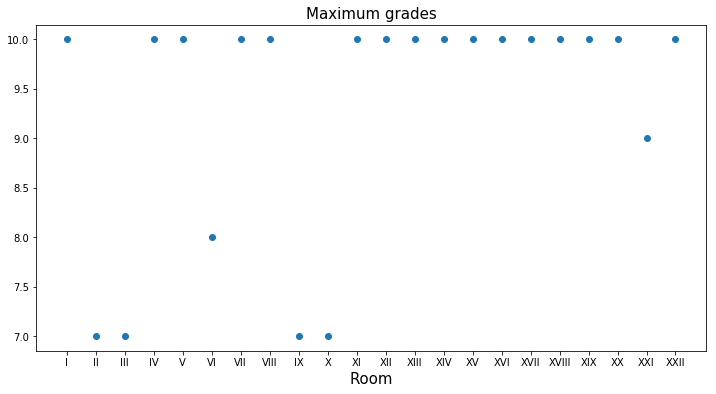

In [4]:
plt.figure(figsize=(12,6))
plt.title("Maximum grades",fontsize=15)
plt.xlabel("Room",fontsize=15)
plt.plot(range(1,mat.shape[1]+1),np.max(mat, axis=0),'o')
plt.xticks(np.arange(1,mat.shape[1]+1),rooms)
plt.show()

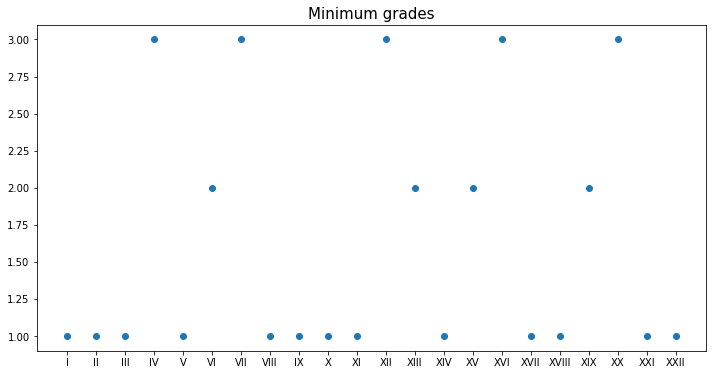

In [5]:
plt.figure(figsize=(12,6))
plt.title("Minimum grades",fontsize=15)
plt.plot(range(1,mat.shape[1]+1),np.min(mat, axis=0),'o')
plt.xticks(np.arange(1,mat.shape[1]+1),rooms)
plt.show()

[[22 16  1 13  4  5 19 20 14  6  2  9  7  3  8 10 15 11 12 21 17 18]
 [12  3  4 16  9  8 15 13  5  6  7 21 18 19 20 22 14 10 11 17  1  2]
 [ 1  2  3 13  9  7  4  8 10  5  6 21 18 19 20 22 14 16 17 15 11 12]
 [18  5  6 13  7  8 19 20  1  2  3 17  9 10 11 15  4 14 16 21 12 22]
 [17 12 13  1  2  3  4 18 14 15 21 16 19  9 10 11 20  5  6  7  8 22]
 [12  1  5 15  2  6 10 13  7  8  9 17 18 19 20 22 11 16 14 21  3  4]
 [17  4  5 18  6 10 11 19  8  9  7 14 21 12 22 15  1 20 13 16  2  3]
 [ 1  5  6 19 20 16 13  2  7  9 10 17 15  8 14 18 11 21 22 12  3  4]
 [15  1  2 20  9 16 17 18  3  4  5 19 12 13 14 21  6 10 11 22  7  8]
 [20  3  4 16 10 12 21 17  7  8  1 22 13 11 14 19  2 15  5 18  9  6]
 [14  5  1 19  2  8 17  6  9  3  4 12 20 22 21 18  7 15 13 16 10 11]
 [ 3  5  6 16 13 14  7 17  4  8  1  9 19 10 20 18 22  2 15 11 21 12]
 [12  2  3 18  7  8 13  9  4  5  6 16 19 20 21 22  1 14 15 17 10 11]
 [ 2  3  4 19  6 14  7  5 15 16 10 18 11 12 13 20  1 21 22 17  8  9]
 [10  5  6 19  4 11 12 13  7  8  9

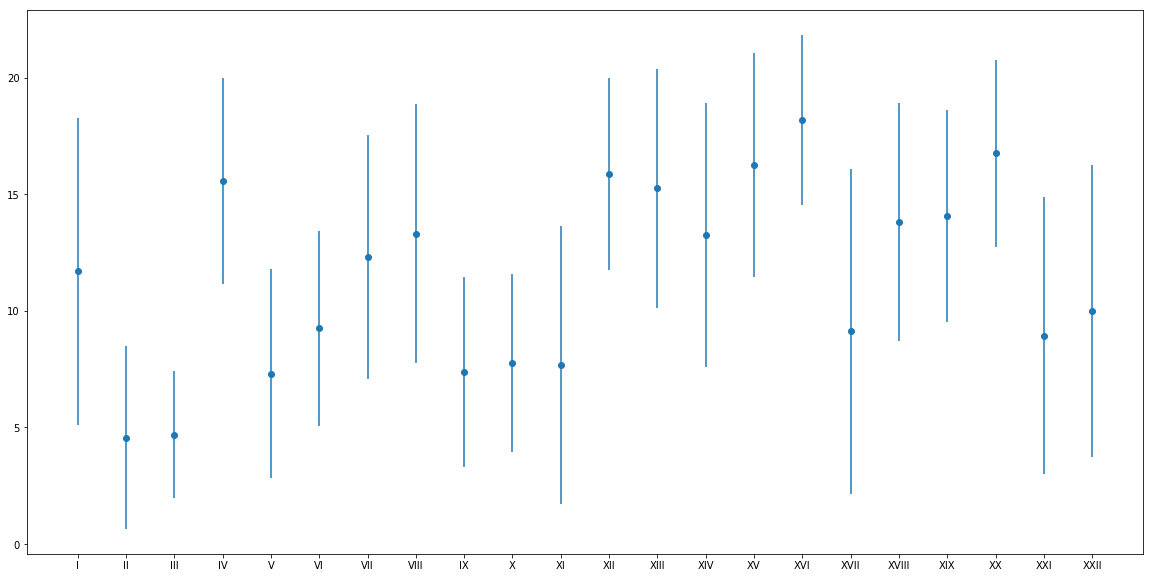

In [6]:
omat = ordinal_matrix(mat)

print(omat)

avg_grade = avg_cols(omat)
dev_grade = std_cols(omat)

x = range(1,omat.shape[1]+1)
y = avg_grade
e = dev_grade


plt.figure(figsize=(20,10))
plt.errorbar(x, y, yerr=e, fmt='o')
#plt.yticks(np.arange(1,omat.shape[0]+1))
plt.xticks(np.arange(1,omat.shape[1]+1),rooms)
plt.show()

[10  7  7 10 10  8 10 10  7  7 10 10 10 10 10 10 10 10 10 10  9 10]
[[22 16 13 20 20 16 21 20 15 16 22 22 21 22 22 22 22 21 22 22 21 22]]


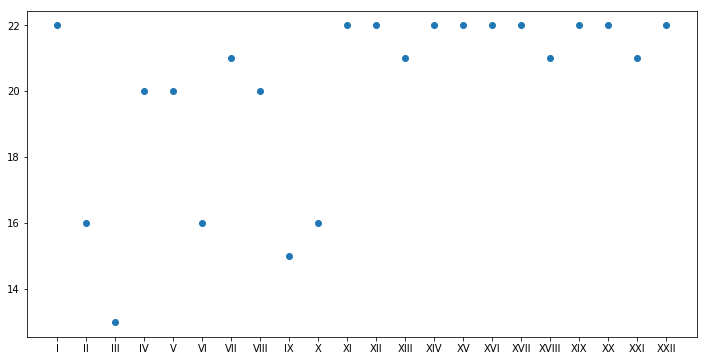

In [7]:
print(np.max(mat, axis=0))

print(np.max(omat, axis=0).reshape(22,))

plt.figure(figsize=(12,6))
plt.plot(range(1,omat.shape[1]+1),np.max(omat, axis=0).reshape(22,1),'o')
#plt.yticks(np.arange(1,omat.shape[0]+1))
plt.xticks(np.arange(1,omat.shape[1]+1),rooms)
plt.show()

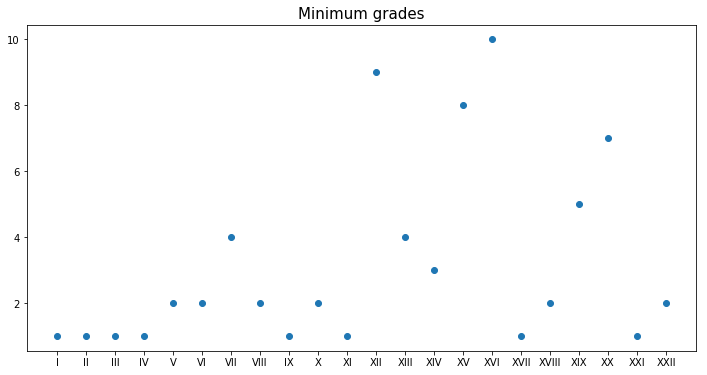

In [8]:
plt.figure(figsize=(12,6))
plt.title("Minimum grades",fontsize=15)
plt.plot(range(1,omat.shape[1]+1),np.min(omat, axis=0).reshape(22,1),'o')
plt.xticks(np.arange(1,omat.shape[1]+1),rooms)
plt.show()

## Data cleaning

We end up deleting rooms II, III, VI, IX, X, and XXI

In [9]:
row_idx = [1,2,5,8,9,20]

mat_clean = mat
rooms_clean = list(rooms)

for i,this_idx in enumerate(row_idx):
    mat_clean = drop_col(mat_clean,this_idx-i)
    del(rooms_clean[this_idx-i])

    
omat_clean = ordinal_matrix(mat_clean)

print(mat_clean.shape)
print(omat_clean.shape)
print(rooms_clean)
#print(mat_clean)
#print(mat)

(16, 16)
(16, 16)
['I', 'IV', 'V', 'VII', 'VIII', 'XI', 'XII', 'XIII', 'XIV', 'XV', 'XVI', 'XVII', 'XVIII', 'XIX', 'XX', 'XXII']


## Preliminary assignment (deterministic)

We use function assign 

In [10]:
result = assign(mat_clean,rooms_clean,persons)
print(result)
evaluate(result,mat_clean,rooms_clean,persons)

{'XXII': 'Joan', 'XVII': 'Clara', 'VIII': 'Pablo', 'XIII': 'Eulalia', 'I': 'Lucas', 'XV': 'Joni', 'VII': 'Guillem', 'XIX': 'Estella', 'XIV': 'Tura', 'XI': 'Julia C', 'V': 'Ruth', 'XVI': 'Aina', 'XII': 'Claire', 'XX': 'Carlo', 'IV': 'Victor', 'XVIII': 'Julia J'}


{'column': 0.95625, 'row': 0.9597222222222223, 'global': 0.9579861111111112}

In [11]:
result = assign(omat_clean,rooms_clean,persons)
print(result)
evaluate(result,omat_clean,rooms_clean,persons)

{'XXII': 'Joan', 'VIII': 'Pablo', 'XVII': 'Clara', 'XIII': 'Eulalia', 'XIX': 'Estella', 'I': 'Lucas', 'XV': 'Joni', 'VII': 'Guillem', 'XIV': 'Tura', 'XII': 'Carlo', 'XVI': 'Aina', 'XX': 'Claire', 'XI': 'Julia C', 'XVIII': 'Victor', 'IV': 'Ruth', 'V': 'Julia J'}


{'column': 0.9663318452380952, 'row': 0.93359375, 'global': 0.9499627976190477}

## Optimization using genetic algorithm


In [353]:
import random

def create_rand_population(size,vec):
    
    population = []
    
    for i in range(size):
        population.append(random.sample(vec,16)     )
    return population

vec = range(0,22)
pop_size = 100

pop1=create_rand_population(pop_size,vec)

#print(create_rand_population(pop_size,vec))


print(pop1[0])

print(pop1)


[13, 10, 21, 12, 4, 3, 15, 5, 14, 1, 2, 18, 7, 6, 17, 16]
[[13, 10, 21, 12, 4, 3, 15, 5, 14, 1, 2, 18, 7, 6, 17, 16], [5, 21, 9, 8, 6, 12, 17, 16, 1, 19, 14, 20, 13, 3, 0, 10], [9, 1, 8, 14, 4, 17, 20, 11, 18, 13, 7, 16, 10, 2, 5, 3], [18, 2, 13, 14, 8, 5, 3, 11, 9, 17, 19, 10, 4, 15, 21, 16], [3, 7, 11, 13, 5, 4, 9, 0, 8, 20, 17, 21, 18, 1, 19, 16], [14, 13, 8, 3, 5, 10, 1, 2, 6, 20, 16, 15, 11, 21, 17, 9], [2, 18, 17, 1, 3, 11, 20, 5, 4, 19, 21, 14, 9, 12, 10, 8], [17, 0, 1, 10, 7, 5, 3, 2, 9, 8, 16, 21, 6, 15, 18, 13], [8, 2, 7, 4, 3, 18, 11, 12, 16, 15, 19, 17, 6, 14, 13, 20], [16, 3, 14, 1, 11, 2, 9, 12, 5, 8, 20, 10, 19, 4, 7, 21], [8, 0, 6, 12, 18, 2, 4, 13, 10, 1, 19, 16, 21, 3, 5, 7], [15, 9, 3, 16, 18, 17, 20, 21, 4, 12, 0, 1, 7, 14, 11, 19], [16, 8, 20, 17, 5, 7, 14, 2, 18, 3, 11, 19, 12, 6, 15, 13], [6, 20, 12, 2, 11, 4, 9, 3, 10, 1, 8, 18, 21, 16, 19, 15], [3, 11, 16, 6, 9, 5, 19, 7, 12, 14, 10, 0, 20, 18, 8, 15], [19, 5, 0, 12, 9, 10, 2, 20, 7, 3, 14, 4, 21, 16, 11, 15], 

In [287]:
def fitness(mat,omat,individual,max_ordinal):
    #global fitness
    sum_fitness = 0
    for person,room in enumerate(individual):
        sum_fitness += mat[person,room]/10. + omat[person,room]/max_ordinal
        print(mat[person,room])        
    return sum_fitness

def fitness_population(mat,omat,population,max_ordinal):
    
    fitness_list = []
    
    for i in range(len(population)):
        sum_fitness = 0
        for person,room in enumerate(population[i]):
            sum_fitness += mat[person,room]/10. + omat[person,room]/max_ordinal
            #print(mat[person,room])        
        fitness_list.append(sum_fitness)
    return np.array(fitness_list)

In [288]:
f_list = fitness_population(mat,omat,pop1,np.max(omat))
print(f_list)

[18.32727273 14.26363636 17.05454545 19.67272727 19.1        18.20909091
 21.43636364 16.83636364 17.08181818 15.81818182 16.10909091 15.87272727
 12.52727273 19.05454545 19.37272727 16.75454545 17.48181818 18.05454545
 17.39090909 16.18181818 13.30909091 14.51818182 18.86363636 18.71818182
 15.37272727 15.34545455 16.31818182 19.18181818 17.94545455 14.76363636
 15.27272727 17.66363636 16.43636364 17.33636364 15.54545455 16.52727273
 19.00909091 20.34545455 17.78181818 17.19090909 18.85454545 17.39090909
 13.24545455 20.15454545 18.77272727 17.27272727 18.29090909 20.34545455
 17.00909091 13.43636364 14.8        13.14545455 17.33636364 14.41818182
 14.2        19.02727273 17.91818182 20.66363636 15.42727273 15.1
 16.97272727 13.93636364 18.01818182 14.1        17.65454545 19.19090909
 20.42727273 17.31818182 18.81818182 17.57272727 17.1        17.39090909
 16.86363636 18.61818182 13.05454545 18.7        19.72727273 15.14545455
 15.00909091 14.3        15.55454545 16.14545455 16.236363

In [365]:
def mutation(individual):
    rnd1 = random.randint(0,len(individual)-1)
    rnd2 = random.randint(0,len(individual)-1)
    individual[rnd1], individual[rnd2] = individual[rnd2], individual[rnd1]

def crossover(individual1,individual2):
    cut = random.randint(1,len(individual1)-2)
    len_individual = len(individual1)
    len_part2 = len_individual-cut
    
    #print(cut)
    
    new_ind1 = -1*np.ones_like(individual1)
    new_ind2 = -1*np.ones_like(individual1)
    
    new_ind1[0:cut] = individual1[0:cut]
    new_ind2[cut:] = individual1[cut:]
    
    #print(new_ind1,"\n",new_ind2)
    
    l = []
    
    num_found = 0
    j = 0
    
    while num_found < len_part2:
        #print(j)
        if individual2[j] not in new_ind1:
            l.append(individual2[j])
            num_found += 1
            #print(num_found)
        j += 1
    
        
    
    new_ind1[cut:] = np.array(l)
    
    l = []
    
    num_found = 0
    j = 0
    
    while num_found < cut:
        #print(j)
        if individual2[j] not in new_ind2:
            l.append(individual2[j])
            num_found += 1
        j += 1

    new_ind2[:cut] = np.array(l)
    
    return new_ind1,new_ind2      

individual1=pop1[0]

print(individual1)

mutation(individual1)

print(individual1)

print("crossover")

print(pop1[0],"\n",pop1[1])

new_ind1,new_ind2 = crossover(pop1[0],pop1[1])

print(new_ind1,"\n",new_ind2)

[13, 10, 21, 12, 4, 3, 15, 5, 14, 1, 2, 18, 7, 6, 17, 16]
[13, 10, 12, 21, 4, 3, 15, 5, 14, 1, 2, 18, 7, 6, 17, 16]
crossover
[13, 10, 12, 21, 4, 3, 15, 5, 14, 1, 2, 18, 7, 6, 17, 16] 
 [5, 21, 9, 8, 6, 12, 17, 16, 1, 19, 14, 20, 13, 3, 0, 10]
[13 10 12 21  4  3 15  5  9  8  6 17 16  1 19 14] 
 [21  9  8 12 19 20 13  5 14  1  2 18  7  6 17 16]


In [352]:
def rank_individuals(f_list):
    
    ordered_idx = np.argsort(-f_list)
    return ordered_idx

rank_individuals(f_list)
print(rank_individuals(f_list))
print(f_list[6])
#a[[1,4]]

[92  6 57 66 37 47 43 96 76  3 94 14 85 65 27 84  4 13 55 36 22 40 68 44
 87 23 75 73  0 46  5 17 62 28 56 38 31 64 69 16 71 18 41 33 52 67 45 39
 70 90  8  2 83 48 98 60 72  7 93 15 88 35 32 26 82 19 81 10 11  9 80 34
 58 24 25 30 77 86 59 78 95 50 29 21 53 79  1 54 63 89 61 91 97 49 20 42
 99 51 74 12]
21.436363636363634


In [423]:
def genetic_algorithm():
    
    #generate initial population randomly (100 individuals, for example)
    
    #while number iterations is not reached:
    #   crossover:
    #      - Shufle vector of 100 elements, and pair them in order (1+2,3+4,etc.)
    #      - Population of offsprings
    #   mutation:
    #      - swap mutation with rate alpha
    #   rank individuals in descending order by fitness
    #   take 1/2 of the population and generate 1/2 new individuals randomly
    
    vec_rooms = range(0,16)
    
    pop_size = 200
    
    pop_init = create_rand_population(pop_size,vec_rooms)
    
    pop_next = np.empty_like(pop_init)
    
    mutation_rate = 0.05
    
    num_iterations = 10000
    
    ii = 0
    
    fitness_vals = []
    
    max_fitness = 0
    
    best_individual = pop_init[0]

    while (ii < num_iterations) & (max_fitness< 24.25):
        
        #generate pairing index
        cross_idx = random.sample(range(pop_size),pop_size) 
        
        #crossover loop from o to 98, with increases of 2
        for i in range(0,pop_size,2):
            print(i,cross_idx[i])
            pop_next[i],pop_next[i+1] = crossover(pop_init[cross_idx[i]],pop_init[cross_idx[i+1]])

        #mutation loop
        for j in range(pop_size):
            if random.random() < mutation_rate:
                mutation(pop_next[j])
                
        #rank individuals from best to worse by fitness
        f_list = fitness_population(mat_clean,omat_clean,pop_next,np.max(omat))
        ranked_idxs = rank_individuals(f_list)
        
        #print("Fitness:", max(f_list))
        
        max_fitness = max(f_list)
        best_individual = pop_next[ranked_idxs[0]]
        
        fitness_vals.append(max(f_list))
        
        #create new population randmoly
        pop_rand = create_rand_population(80,vec_rooms)
        
        #insert two populations as initial populations for next run.
        pop_init[:100] = pop_next[[ranked_idxs[:100]]]
        pop_init[100:] = pop_rand
        
        ii += 1
    
    return fitness_vals, best_individual
    #print(create_first_population(pop_size,vec))

fit_vals = genetic_algorithm()


0 20
2 162
4 8
6 176
8 5
10 135
12 32
14 4
16 49
18 106
20 7
22 91
24 132
26 171
28 33
30 143
32 187
34 47
36 77
38 144
40 113
42 45
44 107
46 120
48 81
50 92
52 30
54 127
56 170
58 173
60 84
62 29
64 6
66 103
68 147
70 172
72 157
74 124
76 136
78 17
80 80
82 186
84 2
86 119
88 44
90 184
92 13
94 95
96 87
98 153
100 129
102 1
104 11
106 52
108 112
110 31
112 25
114 27
116 19
118 73
120 189
122 123
124 150
126 166
128 98
130 60
132 142
134 180
136 141
138 130
140 59
142 57
144 181
146 114
148 79
150 133
152 89
154 70
156 158
158 42
160 14
162 64
164 58
166 167
168 163
170 41
172 118
174 164
176 12
178 9
180 154
182 152
184 21
186 46
188 175
190 199
192 100
194 15
196 28
198 68
0 11
2 98
4 15
6 173
8 21
10 138
12 5
14 56
16 118
18 81
20 53
22 127
24 2


/home/pablo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


IndexError: list index out of range

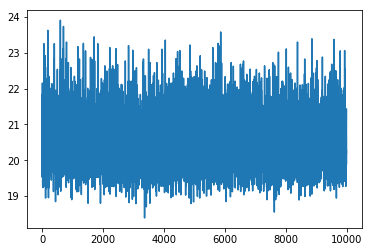

In [419]:
plt.plot(fit_vals[0])